# Git processor demo

Here is a little demo that you can reuse for your own project.

In [13]:
import os

from git_processor.data import Projects


### Create the project and show the dataframe

In [5]:
p = Projects(os.path.abspath("stats.txt"))
p.df


,name,project A,project B,project C
0,hero,122.0,0.0,0.0
1,dog,100.0,12.0,0.0
2,owl,29.0,10.0,0.0
3,loco,6.0,0.0,0.0
4,monkey,6.0,0.0,0.0
5,coder,3.0,2.0,0.0
6,spy,1.0,0.0,0.0
7,owl2,0.0,5.0,0.0
8,badog,0.0,0.0,98.0
9,éspy,0.0,0.0,53.0


### Clean up the name, so that coder with multiple git aliases gets recognized as one

In [14]:
p.clean_up_names()
p.df


,name,project A,project B,project C
0,dog,100.0,12.0,98.0
1,hero,122.0,0.0,0.0
2,locom,6.0,0.0,26.0
3,monkey,6.0,0.0,0.0
4,owl,29.0,15.0,0.0
5,spy,1.0,0.0,53.0
6,thecoder,3.0,2.0,1.0


### Plot the amount of commit per user

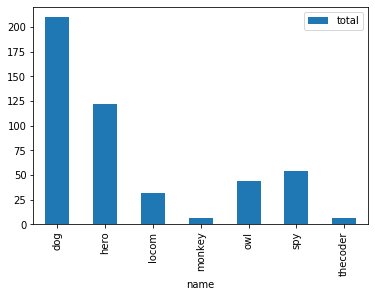

In [15]:
d = p.total().plot(kind='bar', x='name', y='total')


### Display only the amount of commit of the coder with animal aliases

In [16]:
filtered_df = p.df.loc[p.df['name'].isin(['dog', 'monkey', 'owl'])]
filtered_df = filtered_df.set_index('name')
filtered_total = filtered_df.sum(axis=1, skipna=True).reset_index(name='total')


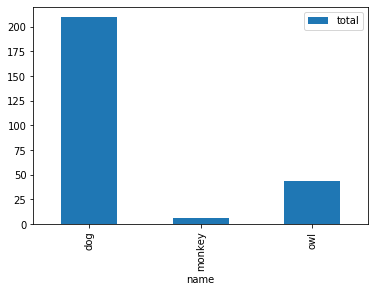

In [17]:
d = filtered_total.plot(kind='bar', x='name', y='total')


### Display percentage of total commit per user

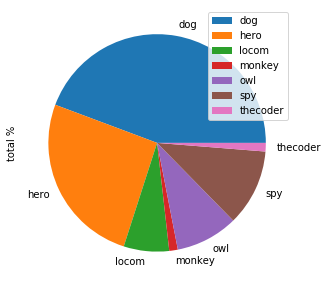

In [19]:
plot = p.total_percentage().plot.pie(y='total %', figsize=(5, 5))

In [ ]:
plot = p.total_project("Project C").plot.pie(y='total %', figsize=(5, 5))

### Display average per user


In [ ]:
plot = p.average().plot(kind='bar', x='name', y='average')